In [18]:
import pandas as pd
import numpy as np

In [19]:
train = pd.read_csv("/kaggle/input/racial-hoax-dataset/Racial_train.csv")
dev = pd.read_csv("/kaggle/input/racial-hoax-dataset/Racial_val.csv")
test = pd.read_csv("/kaggle/input/racial-test-data/Racial_test_without_labels.csv")
train.head()

,clean_text,labels
0,hindu to kuch hai par tum to pori duniya mai g...,1
1,na g jha hindu majority wha muslims chara kbhi...,0
2,great sir ji apne is jatiwadi mansikta wale te...,0
3,mam ye jati prtha to abhi bhi chalte a rahi ha...,0
4,yeh pagal kabhi bhi nahi samjhege ye sab yeh b...,0


In [62]:
test.head()

,ID,clean_text
0,RH_01,"jai hind , in namuno ko bat bhi karni nahi ati..."
1,RH_02,sasta nasha karna band karo bhaikis mandir me ...
2,RH_03,ap insaniyat wali patrakarita karte hai ap bah...
3,RH_04,didi kya likh rhi ho kya smjha rhi ho pta hi n...
4,RH_05,humesa christian ka hen against kerney mein bu...


In [20]:
dev.head()

,clean_text,labels
0,hindu rastra ke ruzhan miya bhai ko kast hai c...,1
1,ese chutiyo ko teacher kahlane ka koi hak hai ...,0
2,wah saurabh bhai excelent ap ki sabse achi bat...,0
3,ha a rhe he or ana bhi chahiye kyunki ajkal ja...,0
4,khulai main namaz nahi to kuch bhi nahi bhaut ...,0


In [21]:
train.shape

(3060, 2)

In [22]:
dev.shape

(1021, 2)

In [23]:
train['labels'].value_counts()

labels
0    2319
1     741
Name: count, dtype: int64

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3060 entries, 0 to 3059
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   clean_text  3060 non-null   object
 1   labels      3060 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.9+ KB


In [25]:
train.isnull().sum()

clean_text    0
labels        0
dtype: int64

In [26]:
# def text_preprocessing(text):
#     import re
#     pattern = re.compile('[@#\/]\S+')
#     text = pattern.sub(r'',text)

#     pattern = re.compile('\d+')
#     text = pattern.sub(r'', text)

#     pattern = re.compile(r'https?:\/\/\S+|www\.\S+|ftp:\/\/\S+|mailto:\S+|https?:')

#     # First remove URLs
#     text = pattern.sub('', text)

#     # Remove newline characters (\n) and carriage returns (\r)
#     text = text.replace('\n', ' ').replace('\r', '')

#     # Remove extra spaces (including multiple spaces)
#     text = re.sub(r'\s+', ' ', text).strip()

#     import string
#     punc = string.punctuation

#     text = text.translate(str.maketrans('','',punc))

#     emoji_pattern = re.compile(
#         "["
#         "\U0001F600-\U0001F64F"  # Emoticons
#         "\U0001F300-\U0001F5FF"  # Symbols & Pictographs
#         "\U0001F680-\U0001F6FF"  # Transport & Map Symbols
#         "\U0001F1E0-\U0001F1FF"  # Flags (iOS)
#         "\U00002700-\U000027BF"  # Dingbats
#         "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
#         "\U00002600-\U000026FF"  # Miscellaneous Symbols
#         "\U00002B50-\U00002B55"  # Stars and other symbols
#         "]+",
#         flags=re.UNICODE
#     )

#     text = emoji_pattern.sub(r'', text)

    

#     # from indic_transliteration import sanscript
#     # from indic_transliteration.sanscript import SchemeMap, SCHEMES, transliterate
    
    
#     # text = transliterate(text, sanscript.HK, sanscript.DEVANAGARI)


    
#     return text

In [27]:
# pip install indic-transliteration

In [28]:
# train['clean_text'] = train['clean_text'].apply(text_preprocessing)
# dev['clean_text'] = dev['clean_text'].apply(text_preprocessing)

In [29]:
train.head()

,clean_text,labels
0,hindu to kuch hai par tum to pori duniya mai g...,1
1,na g jha hindu majority wha muslims chara kbhi...,0
2,great sir ji apne is jatiwadi mansikta wale te...,0
3,mam ye jati prtha to abhi bhi chalte a rahi ha...,0
4,yeh pagal kabhi bhi nahi samjhege ye sab yeh b...,0


In [30]:
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics import classification_report, accuracy_score, f1_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from catboost import CatBoostClassifier



# X_train, y_train = train["clean_text"], train["labels"]
# X_dev, y_dev = dev["clean_text"], dev["labels"]

# # Convert text to TF-IDF
# vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
# X_train_tfidf = vectorizer.fit_transform(X_train)
# X_dev_tfidf = vectorizer.transform(X_dev)

# models = {
#     "Logistic Regression": LogisticRegression(class_weight="balanced"),
#     "Naïve Bayes": MultinomialNB(alpha=1.0),
#     "Support Vector Machine": SVC(kernel='linear', class_weight="balanced"),
#     "Random Forest": RandomForestClassifier(n_estimators=300,class_weight="balanced"),
#     "XGBoost": XGBClassifier(scale_pos_weight=1),
#     # "CatBoost": CatBoostClassifier(class_weights=[1, 3], iterations=500, learning_rate=0.1, depth=6, cat_features=[])
# }
# for model_name, model in models.items():
#     print(f"\nTraining {model_name}...")
#     model.fit(X_train_tfidf, y_train)
    
#     y_pred = model.predict(X_dev_tfidf)
    
#     accuracy = accuracy_score(y_dev, y_pred)
#     f1 = f1_score(y_dev, y_pred, average="macro")
#     report = classification_report(y_dev, y_pred, digits=4)
    
#     print(f"\n{model_name} - Accuracy: {accuracy:.4f}, F1-score: {f1:.4f}\n")
#     print(report)  # Full classification report
#     print("="*80)

In [31]:
test.head()

,ID,clean_text
0,RH_01,"jai hind , in namuno ko bat bhi karni nahi ati..."
1,RH_02,sasta nasha karna band karo bhaikis mandir me ...
2,RH_03,ap insaniyat wali patrakarita karte hai ap bah...
3,RH_04,didi kya likh rhi ho kya smjha rhi ho pta hi n...
4,RH_05,humesa christian ka hen against kerney mein bu...


# **mBERT**

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10


Training: 100%|██████████| 192/192 [00:38<00:00,  4.93it/s, loss=0.419]


Epoch 2/10


Training: 100%|██████████| 192/192 [00:38<00:00,  4.95it/s, loss=0.739]


Epoch 3/10


Training: 100%|██████████| 192/192 [00:38<00:00,  4.95it/s, loss=0.101]


Epoch 4/10


Training: 100%|██████████| 192/192 [00:38<00:00,  4.94it/s, loss=0.477] 


Epoch 5/10


Training: 100%|██████████| 192/192 [00:38<00:00,  4.94it/s, loss=0.228] 


Epoch 6/10


Training: 100%|██████████| 192/192 [00:38<00:00,  4.94it/s, loss=0.587] 


Epoch 7/10


Training: 100%|██████████| 192/192 [00:38<00:00,  4.93it/s, loss=1.57]  


Epoch 8/10


Training: 100%|██████████| 192/192 [00:38<00:00,  4.94it/s, loss=0.0307]


Epoch 9/10


Training: 100%|██████████| 192/192 [00:38<00:00,  4.93it/s, loss=0.0156] 


Epoch 10/10


Training: 100%|██████████| 192/192 [00:38<00:00,  4.93it/s, loss=0.0448] 



Classification Report (Dev):
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       774
           1       0.53      0.52      0.53       247

    accuracy                           0.77      1021
   macro avg       0.69      0.69      0.69      1021
weighted avg       0.77      0.77      0.77      1021



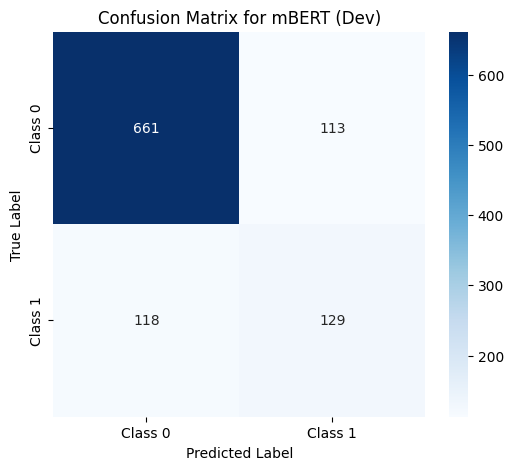

KeyError: 'id'

In [38]:
import pandas as pd
import torch
from sklearn.metrics import classification_report, confusion_matrix
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_scheduler
from tqdm import tqdm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=2)

# Tokenize the texts
train_encodings = tokenizer(train['clean_text'].tolist(), truncation=True, padding=True, max_length=128)
dev_encodings = tokenizer(dev['clean_text'].tolist(), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test['clean_text'].tolist(), truncation=True, padding=True, max_length=128)

# Create a dataset class
class BertDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels=None):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings['input_ids'])

# Create datasets
train_dataset = BertDataset(train_encodings, train['labels'].tolist())
dev_dataset = BertDataset(dev_encodings, dev['labels'].tolist())
test_dataset = BertDataset(test_encodings)

# Calculate class weights
class_counts = train['labels'].value_counts()
total_samples = len(train)
class_weights = {0: 1, 1: 2}
weights = torch.tensor([class_weights[0], class_weights[1]], dtype=torch.float)

# Prepare DataLoader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)

# Optimizer and Scheduler
optimizer = AdamW(model.parameters(), lr=2e-5)
num_epochs = 10
num_training_steps = num_epochs * len(train_loader)
lr_scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)

# Move model to device
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

# Define the loss function with class weights
loss_fn = torch.nn.CrossEntropyLoss(weight=weights).to(device)

# Training Loop with tqdm
model.train()
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    progress_bar = tqdm(train_loader, desc="Training", total=len(train_loader))
    for batch in progress_bar:
        # Move batch to device
        for key in batch:
            batch[key] = batch[key].to(device)

        # Forward pass
        outputs = model(**batch)
        loss = loss_fn(outputs.logits, batch['labels'])

        # Backward pass
        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()

        # Update progress bar
        progress_bar.set_postfix(loss=loss.item())

# Evaluation on dev set
model.eval()
with torch.no_grad():
    dev_loader = torch.utils.data.DataLoader(dev_dataset, batch_size=16)
    predictions_mbert_dev = []
    true_labels_dev = []
    for batch in dev_loader:
        for key in batch:
            batch[key] = batch[key].to(device)
        outputs = model(**batch)
        preds = outputs.logits.argmax(-1)
        predictions_mbert_dev.extend(preds.cpu().numpy())
        true_labels_dev.extend(batch['labels'].cpu().numpy())

# Print classification metrics for dev set
print("\nClassification Report (Dev):")
print(classification_report(true_labels_dev, predictions_mbert_dev))

# Confusion Matrix for dev set
cm_dev = confusion_matrix(true_labels_dev, predictions_mbert_dev)

# Plot Confusion Matrix for dev set
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dev, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for mBERT (Dev)")
plt.show()

# Generate predictions for test set
with torch.no_grad():
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16)
    predictions_mbert_test = []
    for batch in test_loader:
        for key in batch:
            batch[key] = batch[key].to(device)
        outputs = model(**batch)
        preds = outputs.logits.argmax(-1)
        predictions_mbert_test.extend(preds.cpu().numpy())

# Save the predictions as a DataFrame for dev set
# predictions_df_dev = pd.DataFrame({
#     'id': dev['id'],  # Assuming the 'id' column contains the unique identifier
#     'true_label': true_labels_dev,
#     'predicted_label': predictions_mbert_dev
# })

# # Save to CSV file for dev set
# predictions_df_dev.to_csv('predictions_mbert_dev.csv', index=False)

# print("Predictions for dev set saved to 'predictions_mbert_dev.csv'.")

# # Save the predictions as a DataFrame for test set
# predictions_df_test = pd.DataFrame({
#     'id': test['ID'],  # Assuming the 'id' column contains the unique identifier
#     'predicted_label': predictions_mbert_test
# })

# # Save to CSV file for test set
# predictions_df_test.to_csv('predictions_mbert_test.csv', index=False)

# print("Predictions for test set saved to 'predictions_mbert_test.csv'.")

# # Move model to CPU and free GPU memory
# model.cpu()
# torch.cuda.empty_cache()
# print("Model moved to CPU and GPU memory freed.")


In [39]:
predictions_df_test = pd.DataFrame({
    'id': test['ID'],  # Assuming the 'id' column contains the unique identifier
    'predicted_label': predictions_mbert_test
})

# Save to CSV file for test set
predictions_df_test.to_csv('predictions_mbert_test.csv', index=False)

print("Predictions for test set saved to 'predictions_mbert_test.csv'.")

# Move model to CPU and free GPU memory
model.cpu()
torch.cuda.empty_cache()
print("Model moved to CPU and GPU memory freed.")

Predictions for test set saved to 'predictions_mbert_test.csv'.
Model moved to CPU and GPU memory freed.


# **DeBerta**

/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:561: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(
Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed 

Epoch 1/10


Training: 100%|██████████| 192/192 [00:50<00:00,  3.81it/s, loss=0.631]


Epoch 2/10


Training: 100%|██████████| 192/192 [00:50<00:00,  3.82it/s, loss=1.08] 


Epoch 3/10


Training: 100%|██████████| 192/192 [00:50<00:00,  3.81it/s, loss=0.734]


Epoch 4/10


Training: 100%|██████████| 192/192 [00:50<00:00,  3.82it/s, loss=0.143]


Epoch 5/10


Training: 100%|██████████| 192/192 [00:50<00:00,  3.82it/s, loss=0.327]


Epoch 6/10


Training: 100%|██████████| 192/192 [00:50<00:00,  3.82it/s, loss=0.794] 


Epoch 7/10


Training: 100%|██████████| 192/192 [00:50<00:00,  3.82it/s, loss=0.112]


Epoch 8/10


Training: 100%|██████████| 192/192 [00:50<00:00,  3.81it/s, loss=0.552]


Epoch 9/10


Training: 100%|██████████| 192/192 [00:50<00:00,  3.82it/s, loss=0.0852]


Epoch 10/10


Training: 100%|██████████| 192/192 [00:50<00:00,  3.82it/s, loss=0.51]  



Classification Report (Dev):
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       774
           1       0.50      0.61      0.55       247

    accuracy                           0.76      1021
   macro avg       0.68      0.71      0.69      1021
weighted avg       0.78      0.76      0.77      1021



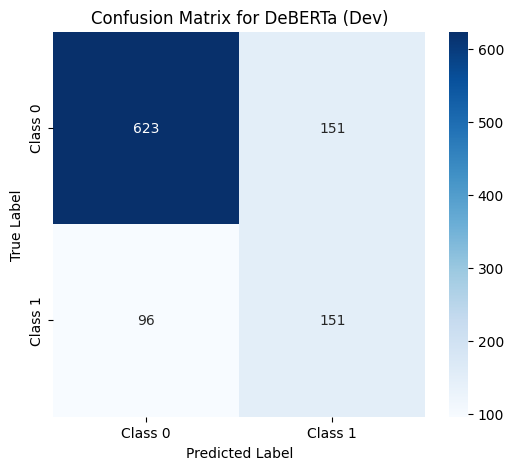

Predictions for test set saved to 'predictions_deberta_test.csv'.
Model moved to CPU and GPU memory freed.


In [40]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW, get_scheduler
from tqdm import tqdm
import numpy as np
import pandas as pd

# Load DeBERTa tokenizer and model
model_name = "microsoft/deberta-v3-base"  # Changeable to other DeBERTa variants
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Tokenize the texts
train_encodings = tokenizer(train['clean_text'].tolist(), truncation=True, padding=True, max_length=128)
dev_encodings = tokenizer(dev['clean_text'].tolist(), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test['clean_text'].tolist(), truncation=True, padding=True, max_length=128)

# Dataset class
class DeBERTaDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels=None):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings['input_ids'])

# Create datasets
train_dataset = DeBERTaDataset(train_encodings, train['labels'].tolist())
dev_dataset = DeBERTaDataset(dev_encodings, dev['labels'].tolist())
test_dataset = DeBERTaDataset(test_encodings)

# Class weights
class_weights = {0: 1, 1: 1.5}
weights = torch.tensor([class_weights[0], class_weights[1]], dtype=torch.float)

# DataLoaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

# Optimizer & Scheduler
optimizer = AdamW(model.parameters(), lr=2e-5)
num_epochs = 10
num_training_steps = num_epochs * len(train_loader)
lr_scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)

# Loss function
loss_fn = torch.nn.CrossEntropyLoss(weight=weights).to(device)

# Training Loop
model.train()
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    progress_bar = tqdm(train_loader, desc="Training", total=len(train_loader))
    for batch in progress_bar:
        for key in batch:
            batch[key] = batch[key].to(device)
        
        outputs = model(**batch)
        loss = loss_fn(outputs.logits, batch['labels'])

        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        progress_bar.set_postfix(loss=loss.item())

# Evaluation on dev set
model.eval()
with torch.no_grad():
    dev_loader = torch.utils.data.DataLoader(dev_dataset, batch_size=16)
    predictions_dev = []
    true_labels_dev = []
    for batch in dev_loader:
        for key in batch:
            batch[key] = batch[key].to(device)
        outputs = model(**batch)
        preds = outputs.logits.argmax(-1)
        predictions_dev.extend(preds.cpu().numpy())
        true_labels_dev.extend(batch['labels'].cpu().numpy())

print("\nClassification Report (Dev):")
print(classification_report(true_labels_dev, predictions_dev))

cm_dev = confusion_matrix(true_labels_dev, predictions_dev)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dev, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for DeBERTa (Dev)")
plt.show()

# Generate predictions for test set
with torch.no_grad():
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16)
    predictions_test = []
    for batch in test_loader:
        for key in batch:
            batch[key] = batch[key].to(device)
        outputs = model(**batch)
        preds = outputs.logits.argmax(-1)
        predictions_test.extend(preds.cpu().numpy())

# # Save predictions
# predictions_df_dev = pd.DataFrame({
#     'id': dev['id'],
#     'true_label': true_labels_dev,
#     'predicted_label': predictions_dev
# })
# predictions_df_dev.to_csv('predictions_deberta_dev.csv', index=False)
# print("Predictions for dev set saved to 'predictions_deberta_dev.csv'.")

predictions_df_test = pd.DataFrame({
    'id': test['ID'],
    'predicted_label': predictions_test
})
predictions_df_test.to_csv('predictions_deberta_test.csv', index=False)
print("Predictions for test set saved to 'predictions_deberta_test.csv'.")

# Free GPU memory
model.cpu()
torch.cuda.empty_cache()
print("Model moved to CPU and GPU memory freed.")

# **Indic**

Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at ai4bharat/indic-bert and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/10


Training: 100%|██████████| 192/192 [00:34<00:00,  5.55it/s, loss=0.396]


Epoch 2/10


Training: 100%|██████████| 192/192 [00:34<00:00,  5.56it/s, loss=0.443]


Epoch 3/10


Training: 100%|██████████| 192/192 [00:34<00:00,  5.56it/s, loss=0.607]


Epoch 4/10


Training: 100%|██████████| 192/192 [00:34<00:00,  5.56it/s, loss=0.168]


Epoch 5/10


Training: 100%|██████████| 192/192 [00:34<00:00,  5.56it/s, loss=0.578]


Epoch 6/10


Training: 100%|██████████| 192/192 [00:34<00:00,  5.57it/s, loss=0.109] 


Epoch 7/10


Training: 100%|██████████| 192/192 [00:34<00:00,  5.56it/s, loss=0.0573]


Epoch 8/10


Training: 100%|██████████| 192/192 [00:34<00:00,  5.57it/s, loss=0.14]  


Epoch 9/10


Training: 100%|██████████| 192/192 [00:34<00:00,  5.57it/s, loss=0.0212]


Epoch 10/10


Training: 100%|██████████| 192/192 [00:34<00:00,  5.57it/s, loss=0.0235]



Classification Report (Dev):
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       774
           1       0.53      0.42      0.47       247

    accuracy                           0.77      1021
   macro avg       0.68      0.65      0.66      1021
weighted avg       0.76      0.77      0.76      1021



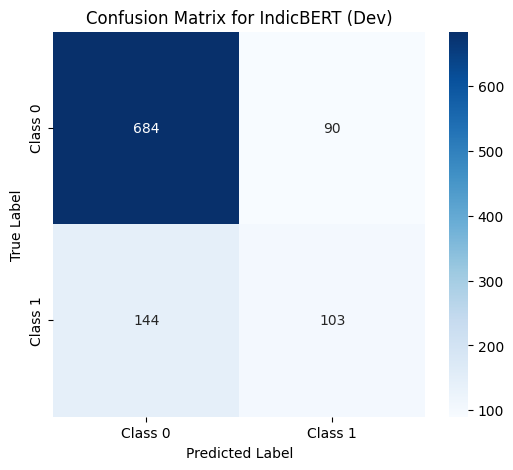

Predictions for test set saved to 'predictions_indic_test.csv'.
Model moved to CPU and GPU memory freed.


In [41]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW, get_scheduler
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load IndicBERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("ai4bharat/indic-bert")
model = AutoModelForSequenceClassification.from_pretrained("ai4bharat/indic-bert", num_labels=2)

# Tokenize the texts
train_encodings = tokenizer(train['clean_text'].tolist(), truncation=True, padding=True, max_length=128)
dev_encodings = tokenizer(dev['clean_text'].tolist(), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test['clean_text'].tolist(), truncation=True, padding=True, max_length=128)

# Create dataset class
class IndicBertDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels=None):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings['input_ids'])

# Create datasets
train_dataset = IndicBertDataset(train_encodings, train['labels'].tolist())
dev_dataset = IndicBertDataset(dev_encodings, dev['labels'].tolist())
test_dataset = IndicBertDataset(test_encodings)

# Class weights
class_weights = {0: 1, 1: 2}
weights = torch.tensor([class_weights[0], class_weights[1]], dtype=torch.float)

# Prepare DataLoader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)

# Optimizer & Scheduler
optimizer = AdamW(model.parameters(), lr=2e-5)
num_epochs = 10
num_training_steps = num_epochs * len(train_loader)
lr_scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)

# Move model to device
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

# Define loss function
loss_fn = torch.nn.CrossEntropyLoss(weight=weights).to(device)

# Training Loop
model.train()
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    progress_bar = tqdm(train_loader, desc="Training", total=len(train_loader))
    for batch in progress_bar:
        for key in batch:
            batch[key] = batch[key].to(device)

        outputs = model(**batch)
        loss = loss_fn(outputs.logits, batch['labels'])

        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()

        progress_bar.set_postfix(loss=loss.item())

# Evaluation on dev set
model.eval()
with torch.no_grad():
    dev_loader = torch.utils.data.DataLoader(dev_dataset, batch_size=16)
    predictions_indic_dev = []
    true_labels_dev = []
    for batch in dev_loader:
        for key in batch:
            batch[key] = batch[key].to(device)
        outputs = model(**batch)
        preds = outputs.logits.argmax(-1)
        predictions_indic_dev.extend(preds.cpu().numpy())
        true_labels_dev.extend(batch['labels'].cpu().numpy())

# Print classification metrics for dev set
print("\nClassification Report (Dev):")
print(classification_report(true_labels_dev, predictions_indic_dev))

# Confusion Matrix for dev set
cm_dev = confusion_matrix(true_labels_dev, predictions_indic_dev)

# Plot Confusion Matrix for dev set
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dev, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for IndicBERT (Dev)")
plt.show()

# Generate predictions for test set
with torch.no_grad():
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16)
    predictions_indic_test = []
    for batch in test_loader:
        for key in batch:
            batch[key] = batch[key].to(device)
        outputs = model(**batch)
        preds = outputs.logits.argmax(-1)
        predictions_indic_test.extend(preds.cpu().numpy())

# Save the predictions as a DataFrame for dev set
# predictions_df_dev = pd.DataFrame({
#     'id': dev['id'],  # Assuming the 'id' column contains the unique identifier
#     'true_label': true_labels_dev,
#     'predicted_label': predictions_indic_dev
# })

# # Save to CSV file for dev set
# predictions_df_dev.to_csv('predictions_indic_dev.csv', index=False)

# print("Predictions for dev set saved to 'predictions_indic_dev.csv'.")

# Save the predictions as a DataFrame for test set
predictions_df_test = pd.DataFrame({
    'id': test['ID'],  # Assuming the 'id' column contains the unique identifier
    'predicted_label': predictions_indic_test
})

# Save to CSV file for test set
predictions_df_test.to_csv('predictions_indic_test.csv', index=False)

print("Predictions for test set saved to 'predictions_indic_test.csv'.")

# Move model to CPU and free GPU memory
model.cpu()
torch.cuda.empty_cache()
print("Model moved to CPU and GPU memory freed.")


# **Muril**

config.json:   0%|          | 0.00/411 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/3.16M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/113 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/953M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/muril-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/10


Training: 100%|██████████| 192/192 [00:40<00:00,  4.76it/s, loss=0.428]


Epoch 2/10


Training: 100%|██████████| 192/192 [00:40<00:00,  4.77it/s, loss=0.803]


Epoch 3/10


Training: 100%|██████████| 192/192 [00:40<00:00,  4.77it/s, loss=0.273]


Epoch 4/10


Training: 100%|██████████| 192/192 [00:40<00:00,  4.77it/s, loss=0.341]


Epoch 5/10


Training: 100%|██████████| 192/192 [00:40<00:00,  4.77it/s, loss=0.261]


Epoch 6/10


Training: 100%|██████████| 192/192 [00:40<00:00,  4.77it/s, loss=0.59] 


Epoch 7/10


Training: 100%|██████████| 192/192 [00:40<00:00,  4.77it/s, loss=0.681]


Epoch 8/10


Training: 100%|██████████| 192/192 [00:40<00:00,  4.77it/s, loss=1.15] 


Epoch 9/10


Training: 100%|██████████| 192/192 [00:40<00:00,  4.77it/s, loss=0.18] 


Epoch 10/10


Training: 100%|██████████| 192/192 [00:40<00:00,  4.77it/s, loss=0.184]



Classification Report (Dev):
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       774
           1       0.54      0.53      0.53       247

    accuracy                           0.78      1021
   macro avg       0.70      0.69      0.69      1021
weighted avg       0.78      0.78      0.78      1021



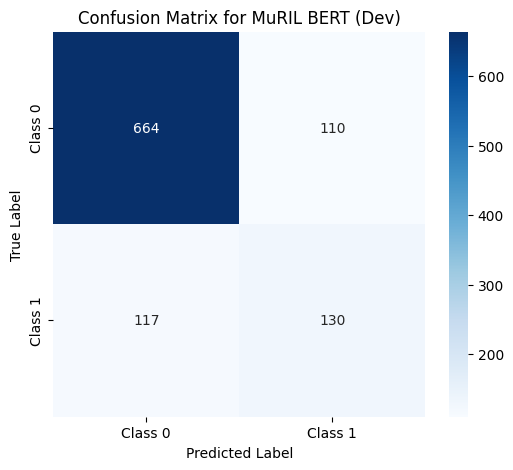

Predictions for test set saved to 'predictions_muril_test.csv'.
Model moved to CPU and GPU memory freed.


In [42]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW, get_scheduler
from tqdm import tqdm

# Load MuRIL-BERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("google/muril-base-cased")
model = AutoModelForSequenceClassification.from_pretrained("google/muril-base-cased", num_labels=2)

# Tokenize the texts
train_encodings = tokenizer(train['clean_text'].tolist(), truncation=True, padding=True, max_length=128)
dev_encodings = tokenizer(dev['clean_text'].tolist(), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test['clean_text'].tolist(), truncation=True, padding=True, max_length=128)

# Create dataset class
class MurilBertDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels=None):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings['input_ids'])

# Create datasets
train_dataset = MurilBertDataset(train_encodings, train['labels'].tolist())
dev_dataset = MurilBertDataset(dev_encodings, dev['labels'].tolist())
test_dataset = MurilBertDataset(test_encodings)

# Class weights
class_weights = {0: 1, 1: 1.5}
weights = torch.tensor([class_weights[0], class_weights[1]], dtype=torch.float)

# Prepare DataLoader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)

# Optimizer & Scheduler
optimizer = AdamW(model.parameters(), lr=2e-5)
num_epochs = 10
num_training_steps = num_epochs * len(train_loader)
lr_scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)

# Move model to device
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

# Define loss function
loss_fn = torch.nn.CrossEntropyLoss(weight=weights).to(device)

# Training Loop
model.train()
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    progress_bar = tqdm(train_loader, desc="Training", total=len(train_loader))
    for batch in progress_bar:
        for key in batch:
            batch[key] = batch[key].to(device)

        outputs = model(**batch)
        loss = loss_fn(outputs.logits, batch['labels'])

        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()

        progress_bar.set_postfix(loss=loss.item())

# Evaluation on dev set
model.eval()
with torch.no_grad():
    dev_loader = torch.utils.data.DataLoader(dev_dataset, batch_size=16)
    predictions_muril_dev = []
    true_labels_dev = []
    for batch in dev_loader:
        for key in batch:
            batch[key] = batch[key].to(device)
        outputs = model(**batch)
        preds = outputs.logits.argmax(-1)
        predictions_muril_dev.extend(preds.cpu().numpy())
        true_labels_dev.extend(batch['labels'].cpu().numpy())

# Print classification metrics for dev set
print("\nClassification Report (Dev):")
print(classification_report(true_labels_dev, predictions_muril_dev))

# Confusion Matrix for dev set
cm_dev = confusion_matrix(true_labels_dev, predictions_muril_dev)

# Plot Confusion Matrix for dev set
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dev, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for MuRIL BERT (Dev)")
plt.show()

# Generate predictions for test set
with torch.no_grad():
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16)
    predictions_muril_test = []
    for batch in test_loader:
        for key in batch:
            batch[key] = batch[key].to(device)
        outputs = model(**batch)
        preds = outputs.logits.argmax(-1)
        predictions_muril_test.extend(preds.cpu().numpy())

# # Save the predictions as a DataFrame for dev set
# predictions_df_dev = pd.DataFrame({
#     'id': dev['id'],  # Assuming the 'id' column contains the unique identifier
#     'true_label': true_labels_dev,
#     'predicted_label': predictions_muril_dev
# })

# # Save to CSV file for dev set
# predictions_df_dev.to_csv('predictions_muril_dev.csv', index=False)

# print("Predictions for dev set saved to 'predictions_muril_dev.csv'.")

# Save the predictions as a DataFrame for test set
predictions_df_test = pd.DataFrame({
    'id': test['ID'],  # Assuming the 'id' column contains the unique identifier
    'predicted_label': predictions_muril_test
})

# Save to CSV file for test set
predictions_df_test.to_csv('predictions_muril_test.csv', index=False)

print("Predictions for test set saved to 'predictions_muril_test.csv'.")

# Move model to CPU and free GPU memory
model.cpu()
torch.cuda.empty_cache()
print("Model moved to CPU and GPU memory freed.")

# **XLM Roberta**

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/20


Training: 100%|██████████| 192/192 [00:41<00:00,  4.63it/s, loss=0.513]


Epoch 2/20


Training: 100%|██████████| 192/192 [00:41<00:00,  4.63it/s, loss=0.197]


Epoch 3/20


Training: 100%|██████████| 192/192 [00:41<00:00,  4.63it/s, loss=0.566]


Epoch 4/20


Training: 100%|██████████| 192/192 [00:41<00:00,  4.62it/s, loss=0.43] 


Epoch 5/20


Training: 100%|██████████| 192/192 [00:41<00:00,  4.62it/s, loss=0.682]


Epoch 6/20


Training: 100%|██████████| 192/192 [00:41<00:00,  4.63it/s, loss=0.375]


Epoch 7/20


Training: 100%|██████████| 192/192 [00:41<00:00,  4.62it/s, loss=0.035]


Epoch 8/20


Training: 100%|██████████| 192/192 [00:41<00:00,  4.62it/s, loss=1.09] 


Epoch 9/20


Training: 100%|██████████| 192/192 [00:41<00:00,  4.62it/s, loss=0.0348]


Epoch 10/20


Training: 100%|██████████| 192/192 [00:41<00:00,  4.62it/s, loss=0.0517]


Epoch 11/20


Training: 100%|██████████| 192/192 [00:41<00:00,  4.63it/s, loss=0.979] 


Epoch 12/20


Training: 100%|██████████| 192/192 [00:41<00:00,  4.63it/s, loss=0.13]  


Epoch 13/20


Training: 100%|██████████| 192/192 [00:41<00:00,  4.62it/s, loss=0.0137]


Epoch 14/20


Training: 100%|██████████| 192/192 [00:41<00:00,  4.62it/s, loss=0.0244] 


Epoch 15/20


Training: 100%|██████████| 192/192 [00:41<00:00,  4.62it/s, loss=0.0275] 


Epoch 16/20


Training: 100%|██████████| 192/192 [00:41<00:00,  4.62it/s, loss=0.00985]


Epoch 17/20


Training: 100%|██████████| 192/192 [00:41<00:00,  4.62it/s, loss=0.00463]


Epoch 18/20


Training: 100%|██████████| 192/192 [00:41<00:00,  4.63it/s, loss=0.00724]


Epoch 19/20


Training: 100%|██████████| 192/192 [00:41<00:00,  4.63it/s, loss=0.0777] 


Epoch 20/20


Training: 100%|██████████| 192/192 [00:41<00:00,  4.62it/s, loss=0.0125] 



Classification Report (Dev):
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       774
           1       0.53      0.47      0.50       247

    accuracy                           0.77      1021
   macro avg       0.68      0.67      0.67      1021
weighted avg       0.76      0.77      0.77      1021



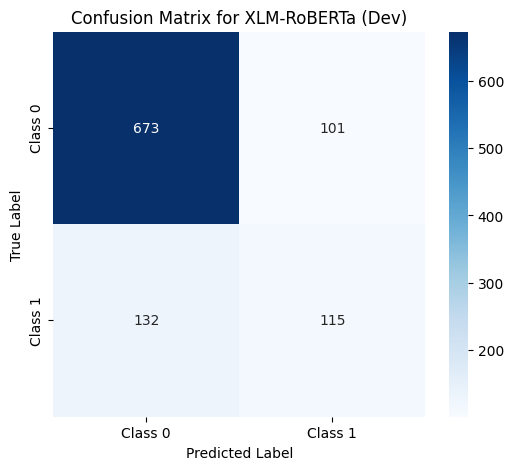

Predictions for test set saved to 'predictions_xlmroberta_test.csv'.
Model moved to CPU and GPU memory freed.


In [43]:
import pandas as pd
import torch
from sklearn.metrics import classification_report, confusion_matrix
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW, get_scheduler
from tqdm import tqdm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the tokenizer and model for XLM-RoBERTa
tokenizer = AutoTokenizer.from_pretrained('xlm-roberta-base')
model = AutoModelForSequenceClassification.from_pretrained('xlm-roberta-base', num_labels=2)

# Tokenize the texts
train_encodings = tokenizer(train['clean_text'].tolist(), truncation=True, padding=True, max_length=128)
dev_encodings = tokenizer(dev['clean_text'].tolist(), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test['clean_text'].tolist(), truncation=True, padding=True, max_length=128)

# Create a dataset class
class XLMRobertaDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels=None):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings['input_ids'])

# Create datasets
train_dataset = XLMRobertaDataset(train_encodings, train['labels'].tolist())
dev_dataset = XLMRobertaDataset(dev_encodings, dev['labels'].tolist())
test_dataset = XLMRobertaDataset(test_encodings)

# Calculate class weights
class_counts = train['labels'].value_counts()
total_samples = len(train)
class_weights = {0: 1, 1: 1.5}
weights = torch.tensor([class_weights[0], class_weights[1]], dtype=torch.float)

# Prepare DataLoader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)

# Optimizer and Scheduler
optimizer = AdamW(model.parameters(), lr=2e-5)
num_epochs = 20
num_training_steps = num_epochs * len(train_loader)
lr_scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)

# Move model to device
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

# Define the loss function with class weights
loss_fn = torch.nn.CrossEntropyLoss(weight=weights).to(device)

# Training Loop with tqdm
model.train()
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    progress_bar = tqdm(train_loader, desc="Training", total=len(train_loader))
    for batch in progress_bar:
        # Move batch to device
        for key in batch:
            batch[key] = batch[key].to(device)

        # Forward pass
        outputs = model(**batch)
        loss = loss_fn(outputs.logits, batch['labels'])

        # Backward pass
        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()

        # Update progress bar
        progress_bar.set_postfix(loss=loss.item())

# Evaluation on dev set
model.eval()
with torch.no_grad():
    dev_loader = torch.utils.data.DataLoader(dev_dataset, batch_size=16)
    predictions_xlmroberta_dev = []
    true_labels_dev = []
    for batch in dev_loader:
        for key in batch:
            batch[key] = batch[key].to(device)
        outputs = model(**batch)
        preds = outputs.logits.argmax(-1)
        predictions_xlmroberta_dev.extend(preds.cpu().numpy())
        true_labels_dev.extend(batch['labels'].cpu().numpy())

# Print classification metrics for dev set
print("\nClassification Report (Dev):")
print(classification_report(true_labels_dev, predictions_xlmroberta_dev))

# Confusion Matrix for dev set
cm_dev = confusion_matrix(true_labels_dev, predictions_xlmroberta_dev)

# Plot Confusion Matrix for dev set
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dev, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for XLM-RoBERTa (Dev)")
plt.show()

# Generate predictions for test set
with torch.no_grad():
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16)
    predictions_xlmroberta_test = []
    for batch in test_loader:
        for key in batch:
            batch[key] = batch[key].to(device)
        outputs = model(**batch)
        preds = outputs.logits.argmax(-1)
        predictions_xlmroberta_test.extend(preds.cpu().numpy())

# # Save the predictions as a DataFrame for dev set
# predictions_df_dev = pd.DataFrame({
#     'id': dev['id'],  # Assuming the 'id' column contains the unique identifier
#     'true_label': true_labels_dev,
#     'predicted_label': predictions_xlmroberta_dev
# })

# # Save to CSV file for dev set
# predictions_df_dev.to_csv('predictions_xlmroberta_dev.csv', index=False)

# print("Predictions for dev set saved to 'predictions_xlmroberta_dev.csv'.")

# Save the predictions as a DataFrame for test set
predictions_df_test = pd.DataFrame({
    'id': test['ID'],  # Assuming the 'id' column contains the unique identifier
    'predicted_label': predictions_xlmroberta_test
})

# Save to CSV file for test set
predictions_df_test.to_csv('predictions_xlmroberta_test.csv', index=False)

print("Predictions for test set saved to 'predictions_xlmroberta_test.csv'.")

# Move model to CPU and free GPU memory
model.cpu()
torch.cuda.empty_cache()
print("Model moved to CPU and GPU memory freed.")


# **DistilBert**

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/15


Training: 100%|██████████| 192/192 [00:21<00:00,  9.11it/s, loss=0.488]


Epoch 2/15


Training: 100%|██████████| 192/192 [00:21<00:00,  9.12it/s, loss=0.644]


Epoch 3/15


Training: 100%|██████████| 192/192 [00:21<00:00,  9.12it/s, loss=0.533]


Epoch 4/15


Training: 100%|██████████| 192/192 [00:20<00:00,  9.16it/s, loss=0.48] 


Epoch 5/15


Training: 100%|██████████| 192/192 [00:20<00:00,  9.17it/s, loss=0.0547]


Epoch 6/15


Training: 100%|██████████| 192/192 [00:20<00:00,  9.17it/s, loss=0.761] 


Epoch 7/15


Training: 100%|██████████| 192/192 [00:20<00:00,  9.18it/s, loss=0.00472]


Epoch 8/15


Training: 100%|██████████| 192/192 [00:20<00:00,  9.17it/s, loss=0.011]  


Epoch 9/15


Training: 100%|██████████| 192/192 [00:20<00:00,  9.16it/s, loss=0.00144]


Epoch 10/15


Training: 100%|██████████| 192/192 [00:20<00:00,  9.17it/s, loss=0.00813]


Epoch 11/15


Training: 100%|██████████| 192/192 [00:20<00:00,  9.18it/s, loss=0.00127]


Epoch 12/15


Training: 100%|██████████| 192/192 [00:21<00:00,  9.13it/s, loss=0.0177] 


Epoch 13/15


Training: 100%|██████████| 192/192 [00:21<00:00,  9.14it/s, loss=0.00198]


Epoch 14/15


Training: 100%|██████████| 192/192 [00:20<00:00,  9.16it/s, loss=0.00104]


Epoch 15/15


Training: 100%|██████████| 192/192 [00:20<00:00,  9.15it/s, loss=0.00196]



Classification Report (Dev):
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       774
           1       0.54      0.46      0.50       247

    accuracy                           0.77      1021
   macro avg       0.69      0.67      0.67      1021
weighted avg       0.76      0.77      0.77      1021



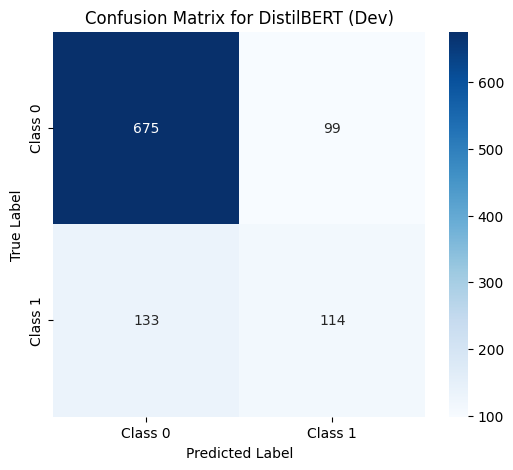

Predictions for test set saved to 'predictions_distilbert_test.csv'.
Model moved to CPU and GPU memory freed.


In [45]:
import pandas as pd
import torch
from sklearn.metrics import classification_report, confusion_matrix
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW, get_scheduler
from tqdm import tqdm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the tokenizer and model for DistilBERT
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-multilingual-cased')
model = AutoModelForSequenceClassification.from_pretrained('distilbert-base-multilingual-cased', num_labels=2)

# Tokenize the texts
train_encodings = tokenizer(train['clean_text'].tolist(), truncation=True, padding=True, max_length=128)
dev_encodings = tokenizer(dev['clean_text'].tolist(), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test['clean_text'].tolist(), truncation=True, padding=True, max_length=128)

# Create a dataset class
class DistilBertDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels=None):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings['input_ids'])

# Create datasets
train_dataset = DistilBertDataset(train_encodings, train['labels'].tolist())
dev_dataset = DistilBertDataset(dev_encodings, dev['labels'].tolist())
test_dataset = DistilBertDataset(test_encodings)

# Calculate class weights
class_counts = train['labels'].value_counts()
total_samples = len(train)
class_weights = {0: 1, 1: 1.8}
weights = torch.tensor([class_weights[0], class_weights[1]], dtype=torch.float)

# Prepare DataLoader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)

# Optimizer and Scheduler
optimizer = AdamW(model.parameters(), lr=2e-5)
num_epochs = 15
num_training_steps = num_epochs * len(train_loader)
lr_scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)

# Move model to device
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

# Define the loss function with class weights
loss_fn = torch.nn.CrossEntropyLoss(weight=weights).to(device)

# Training Loop with tqdm
model.train()
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    progress_bar = tqdm(train_loader, desc="Training", total=len(train_loader))
    for batch in progress_bar:
        # Move batch to device
        for key in batch:
            batch[key] = batch[key].to(device)

        # Forward pass
        outputs = model(**batch)
        loss = loss_fn(outputs.logits, batch['labels'])

        # Backward pass
        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()

        # Update progress bar
        progress_bar.set_postfix(loss=loss.item())

# Evaluation on dev set
model.eval()
with torch.no_grad():
    dev_loader = torch.utils.data.DataLoader(dev_dataset, batch_size=16)
    predictions_distilbert_dev = []
    true_labels_dev = []
    for batch in dev_loader:
        for key in batch:
            batch[key] = batch[key].to(device)
        outputs = model(**batch)
        preds = outputs.logits.argmax(-1)
        predictions_distilbert_dev.extend(preds.cpu().numpy())
        true_labels_dev.extend(batch['labels'].cpu().numpy())

# Print classification metrics for dev set
print("\nClassification Report (Dev):")
print(classification_report(true_labels_dev, predictions_distilbert_dev))

# Confusion Matrix for dev set
cm_dev = confusion_matrix(true_labels_dev, predictions_distilbert_dev)

# Plot Confusion Matrix for dev set
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dev, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for DistilBERT (Dev)")
plt.show()

# Generate predictions for test set
with torch.no_grad():
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16)
    predictions_distilbert_test = []
    for batch in test_loader:
        for key in batch:
            batch[key] = batch[key].to(device)
        outputs = model(**batch)
        preds = outputs.logits.argmax(-1)
        predictions_distilbert_test.extend(preds.cpu().numpy())

# Save the predictions as a DataFrame for test set
predictions_df_test = pd.DataFrame({
    'id': test['ID'],  # Assuming the 'ID' column contains the unique identifier
    'predicted_label': predictions_distilbert_test
})

# Save to CSV file for test set
predictions_df_test.to_csv('predictions_distilbert_test.csv', index=False)

print("Predictions for test set saved to 'predictions_distilbert_test.csv'.")

# Move model to CPU and free GPU memory
model.cpu()
torch.cuda.empty_cache()
print("Model moved to CPU and GPU memory freed.")


# **Ensemble**

In [ ]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import classification_report, confusion_matrix

# # Load predictions from all models
# pred_indic = pd.read_csv("predictions_indic.csv")
# pred_muril = pd.read_csv("predictions_muril.csv")
# pred_xlm = pd.read_csv("predictions_xlm.csv")
# pred_mbert = pd.read_csv("predictions_mbert.csv")
# pred_distil = pd.read_csv("predictions_distilbert.csv")
# pred_deberta = pd.read_csv("predictions_deberta.csv")  # Added DeBERTa predictions

# Define weights for each model (adjust based on performance)
# weights = {
#     "indic": 0.15,
#     "muril": 0.3,
#     "xlm": 0.15,
#     "mbert": 0.3,
#     "distil": 0.2,
#     "deberta": 0.35  # Added DeBERTa weight
# }

# # Ensure all DataFrames have the same text order
# assert (pred_indic['text'] == pred_muril['text']).all()
# assert (pred_indic['text'] == pred_xlm['text']).all()
# assert (pred_indic['text'] == pred_mbert['text']).all()
# assert (pred_indic['text'] == pred_distil['text']).all()
# assert (pred_indic['text'] == pred_deberta['text']).all()


# # Extract ground truth labels
# true_labels = pred_indic['true_label'].to_numpy()

# # Convert predictions to numpy arrays
# pred_indic_array = pred_indic['predicted_label'].to_numpy()
# pred_muril_array = pred_muril['predicted_label'].to_numpy()
# pred_xlm_array = pred_xlm['predicted_label'].to_numpy()
# pred_mbert_array = pred_mbert['predicted_label'].to_numpy()
# pred_distil_array = pred_distil['predicted_label'].to_numpy()
# pred_deberta_array = pred_deberta['predicted_label'].to_numpy()  # Added DeBERTa

# # Compute weighted sum of predictions
# weighted_preds = (
#     weights["indic"] * pred_indic_array +
#     weights["muril"] * pred_muril_array +
#     weights["xlm"] * pred_xlm_array +
#     weights["mbert"] * pred_mbert_array +
#     weights["distil"] * pred_distil_array +
#     weights["deberta"] * pred_deberta_array  # Added DeBERTa
# )

# # Convert weighted sum into final prediction (thresholding at 0.5 for binary classification)
# final_predictions = (weighted_preds >= 0.5).astype(int)

# # Save final ensemble predictions
# ensemble_df = pd.DataFrame({
#     'clean_text': pred_indic['text'],  # Use clean_text instead of text
#     'true_label': true_labels,
#     'ensemble_predicted_label': final_predictions
# })
# ensemble_df.to_csv("ensemble_predictions.csv", index=False)
# print("Ensemble predictions saved to 'ensemble_predictions.csv'.")

# # Generate classification report
# print("\nClassification Report for Ensemble Model:")
# print(classification_report(true_labels, final_predictions))

# # Compute confusion matrix
# cm = confusion_matrix(true_labels, final_predictions)

# # Plot confusion matrix
# plt.figure(figsize=(6, 5))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
# plt.xlabel("Predicted Label")
# plt.ylabel("True Label")
# plt.title("Confusion Matrix for Ensemble Model")
# plt.show()

In [57]:
pred_muril_test.head()

,id,predicted_label
0,RH_01,0
1,RH_02,0
2,RH_03,0
3,RH_04,0
4,RH_05,0


In [65]:
import pandas as pd
import numpy as np


# Load test predictions from all models
pred_indic_test = pd.read_csv("predictions_indic_test.csv")
pred_muril_test = pd.read_csv("predictions_muril_test.csv")
pred_xlm_test = pd.read_csv("predictions_xlmroberta_test.csv")
pred_mbert_test = pd.read_csv("predictions_mbert_test.csv")
pred_distil_test = pd.read_csv("predictions_distilbert_test.csv")
pred_deberta_test = pd.read_csv("predictions_deberta_test.csv")

# Define model weights (should sum to 1)
weights = {
    "indic": 0.15,
    "muril": 0.35,
    "xlm": 0.2,
    "mbert": 0.3,
    "distil": 0.2,
    "deberta": 0.3
}

# Ensure all DataFrames have the same ID order
# Ensure all DataFrames have the same ID order
assert (pred_indic_test['id'] == pred_muril_test['id']).all()
assert (pred_indic_test['id'] == pred_xlm_test['id']).all()
assert (pred_indic_test['id'] == pred_mbert_test['id']).all()
assert (pred_indic_test['id'] == pred_distil_test['id']).all()
assert (pred_indic_test['id'] == pred_deberta_test['id']).all()

# Convert predictions to numpy arrays
pred_indic_array = pred_indic_test['predicted_label'].astype(float).to_numpy()
pred_muril_array = pred_muril_test['predicted_label'].astype(float).to_numpy()
pred_xlm_array = pred_xlm_test['predicted_label'].astype(float).to_numpy()
pred_mbert_array = pred_mbert_test['predicted_label'].astype(float).to_numpy()
pred_distil_array = pred_distil_test['predicted_label'].astype(float).to_numpy()
pred_deberta_array = pred_deberta_test['predicted_label'].astype(float).to_numpy()

# Compute weighted sum of predictions
weighted_preds = (
    weights["indic"] * pred_indic_array +
    weights["muril"] * pred_muril_array +
    weights["xlm"] * pred_xlm_array +
    weights["mbert"] * pred_mbert_array +
    weights["distil"] * pred_distil_array +
    weights["deberta"] * pred_deberta_array
)

# Convert weighted sum into final prediction (threshold at 0.5 for binary classification)
final_predictions = (weighted_preds >= 0.5).astype(int)

# Merge predictions with test data (keeping ID and clean_text)
submission_df = test[['ID', 'clean_text']].copy()
submission_df["predicted_label"] = final_predictions  # Add final ensemble predictions

# Save final test ensemble predictions
submission_df.to_csv("ensemble_submission.csv", index=False)

print("Ensemble submission saved to 'ensemble_submission.csv'")


Ensemble submission saved to 'ensemble_submission.csv'


In [68]:
sub = pd.read_csv("/kaggle/working/ensemble_submission.csv")
sub.head()

,"jai hind , in namuno ko bat bhi karni nahi ati hai , inko pension chahiye",0
0,sasta nasha karna band karo bhaikis mandir me ...,0
1,ap insaniyat wali patrakarita karte hai ap bah...,0
2,didi kya likh rhi ho kya smjha rhi ho pta hi n...,0
3,humesa christian ka hen against kerney mein bu...,0
4,yes tabhi hum apne wrestlers k sath h taki kal...,0


In [67]:
# Drop the ID column
submission_df = submission_df.drop(columns=["ID"])

# Save final test ensemble predictions without column headers
submission_df.to_csv("ensemble_submission.csv", index=False, header=False)